In [1]:
import os
import os.path
import pyarrow as pa
import pyarrow.csv as csv
import pandas as pd
import bisect
from zipfile import *
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib_venn import venn3
import numpy as np
import re
import seaborn as sns
from time import process_time as pt
from Bio.Seq import Seq
from Bio import pairwise2
from matplotlib.colors import LogNorm, Normalize
from matplotlib.colors import LinearSegmentedColormap
import sys
import statistics
from tqdm import tqdm 
import swifter
import glob
from itertools import zip_longest
from collections import Counter
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cairosvg
import math

In [2]:
def unique(list1): #return only the unique elements of a list (no duplicates)
    x = np.array(list1)
    unique_list = np.unique(x).tolist()
    return unique_list

In [3]:
output_filepath = '/data/annika/POT1_Screen_VUS_Combined/FigureGeneration/PersistenceDepletion'
figure_filepath = '/data/annika/POT1_Screen_VUS_Combined/FigureGeneration/SummaryViolinplots'
all_thresholds = ['1e-06']

combined_df = pd.read_csv('/data/annika/POT1_Screen_VUS_Combined/FigureGeneration/PersistenceDepletion/1_1e-06_Combined_3Bioreps_scored.csv')

In [4]:
ordering = ['Unedited','Silent','Alanine','Substitution','Deletion','In Frame','Frame Shift']

In [5]:
plot_df = combined_df[['mutation_name','reclassed_mutation_type','mean_wk3_fc','mean_wk3_log2fc']]
plot_df = plot_df.replace('WT','Unedited')
plot_df

,mutation_name,reclassed_mutation_type,mean_wk3_fc,mean_wk3_log2fc
0,M1A,Alanine,0.011253,-7.608999
1,S2A,Alanine,1.321442,0.398138
2,L3A,Alanine,0.241954,-2.568185
3,M1del,Deletion,0.019539,-7.160311
4,S2del,Deletion,1.420633,0.499103
...,...,...,...,...
3464,I607V,Substitution,1.454343,0.498958
3465,K608R,Substitution,1.399052,0.469068
3466,N611D,Substitution,1.370654,0.204160
3467,Unedited,Unedited,1.112252,0.154658


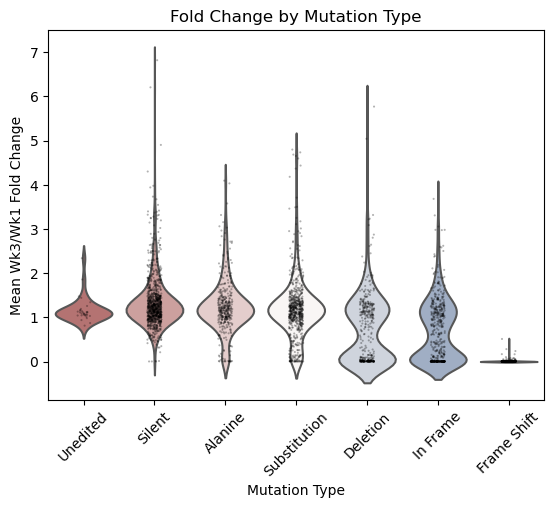

In [6]:
fig,ax = plt.subplots()
ax = sns.violinplot(data=plot_df,x="reclassed_mutation_type",y='mean_wk3_fc',scale='width',
                    palette='vlag_r',order=ordering,inner=None)
ax = sns.stripplot(data=plot_df,x="reclassed_mutation_type",y='mean_wk3_fc',
                    dodge=True,jitter=0.1,size=1.5,color='black',order=ordering,alpha=0.3)
ax.set_ylabel('Mean Wk3/Wk1 Fold Change')
ax.set_xlabel('Mutation Type')
ax.tick_params(axis='x', labelrotation=45)
ax.set_title('Fold Change by Mutation Type')
fig.savefig(os.path.join(figure_filepath,'FC_violin_plot.png'),bbox_inches='tight')
fig.savefig(os.path.join(figure_filepath,'FC_violin_plot_Transparent.png'),bbox_inches='tight',transparent=True)
svg_path = os.path.join(figure_filepath,'FC_violin_plot.svg')
ai_path = os.path.join(figure_filepath,'FC_violin_plot.ai')
plt.rcParams['svg.fonttype'] = 'none'
# Save the heatmap as an SVG file
plt.savefig(svg_path, format="svg",bbox_inches='tight')
# Convert the SVG file to AI format
cairosvg.svg2pdf(url=svg_path, write_to=ai_path)
plt.show()
plt.close()

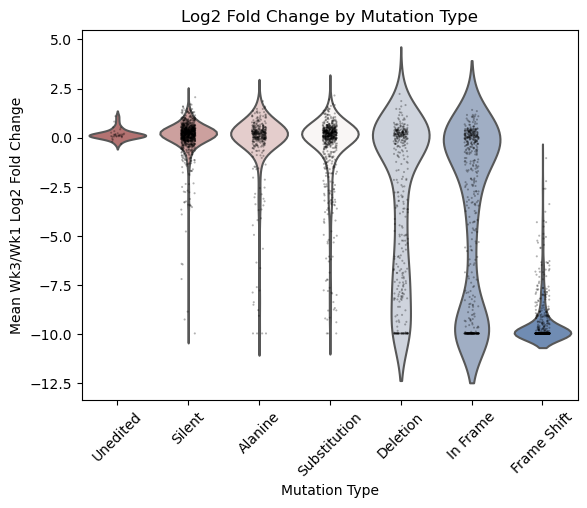

In [7]:
fig,ax = plt.subplots()
ax = sns.violinplot(data=plot_df,x="reclassed_mutation_type",y='mean_wk3_log2fc',scale='width',
                    palette='vlag_r',order=ordering,inner=None)
ax = sns.stripplot(data=plot_df,x="reclassed_mutation_type",y='mean_wk3_log2fc',
                    dodge=True,jitter=0.1,size=1.5,color='black',order=ordering,alpha=0.3)
ax.set_ylabel('Mean Wk3/Wk1 Log2 Fold Change')
ax.set_xlabel('Mutation Type')
ax.tick_params(axis='x', labelrotation=45)
ax.set_title('Log2 Fold Change by Mutation Type')
fig.savefig(os.path.join(figure_filepath,'Log2FC_violin_plot.png'),bbox_inches='tight')
fig.savefig(os.path.join(figure_filepath,'Log2FC_violin_plot_Transparent.png'),bbox_inches='tight',transparent=True)
svg_path = os.path.join(figure_filepath,'Log2FC_violin_plot.svg')
ai_path = os.path.join(figure_filepath,'Log2FC_violin_plot.ai')
plt.rcParams['svg.fonttype'] = 'none'
# Save the heatmap as an SVG file
plt.savefig(svg_path, format="svg",bbox_inches='tight')
# Convert the SVG file to AI format
cairosvg.svg2pdf(url=svg_path, write_to=ai_path)
plt.show()
plt.close()